# SciPy's probability distributions, ufuncs, and unit testing

In [1]:
import numpy as np
import scipy
from scipy import stats, integrate
import matplotlib as mpl

from matplotlib.pyplot import *
from scipy import *

ion()

## SciPy's probability distributions

In [2]:
stats.beta?

In [3]:
prior = stats.beta(1, 1)  # flat prior as a "frozen" beta object

(0, 1.2)

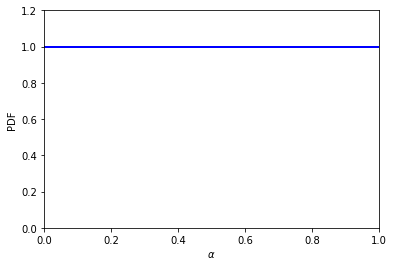

In [28]:
alphas = linspace(0., 1., 200)
plot(alphas, prior.pdf(alphas), 'b-', lw=2, label='Prior')

# Always label axes!
xlabel(r'$\alpha$')
ylabel('PDF')
xlim(0, 1)
ylim(0, 1.2)

For color choices, see: [Matplotlib 2 default colors](https://matplotlib.org/users/dflt_style_changes.html#colors-color-cycles-and-color-maps) for the default set (~10 colors), and [Specifying Colors](https://matplotlib.org/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py) for full details.

In [5]:
stats.binom?

Text(0,0.5,'PDF')

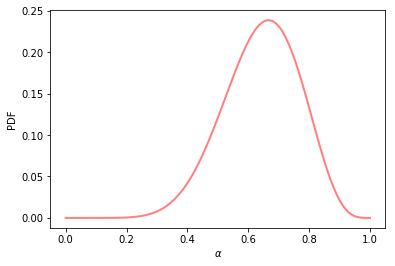

In [31]:
def like(alpha, n, ntot):
    """
    Likelihood function for `alpha`, the success probability in a binomial
    sampling dist'n for `n` successes in `ntot` trials.
    """
    return stats.binom.pmf(n, ntot, alpha)

n, ntot = 8, 12  # n successes in ntot trials

# Save the likelihood values for use in posterior.
lvals = like(alphas, n, ntot)  # note alphas is an array

plot(alphas, lvals, 'r-', lw=2, alpha=.5, label='Like')
xlabel(r'$\alpha$')
ylabel('PDF')


This worked because `stats.binom.pmf` is a "universal function" or *ufunc*: a function that can take a NumPy `ndarray` argument (of any dimension, including a "0-dimensional" scalar) and apply the function across the array.  For more, see: [Universal functions (ufunc) — NumPy Manual](https://docs.scipy.org/doc/numpy/reference/ufuncs.html).

In [7]:
integrate.trapz?

In [8]:
# Marginal likelihood calculation:
mlike = integrate.trapz(prior.pdf(alphas)*lvals, alphas)
print('Marg. likelihood:', mlike)

Marg. likelihood: 0.07692307692332977


Posterior norm: 0.9999999999999999


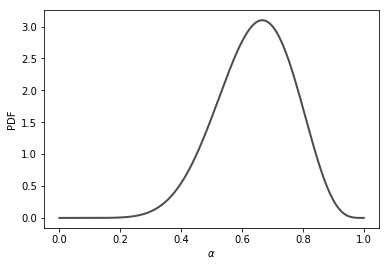

In [9]:
# Plot the posterior.

ppdf = prior.pdf(alphas)*lvals/mlike
plot(alphas, prior.pdf(alphas)*lvals/mlike, 'k-', lw=2, alpha=.7, label='Post')

xlabel(r'$\alpha$')
ylabel('PDF')

# Check the normalization:
print('Posterior norm:', integrate.trapz(ppdf, alphas))

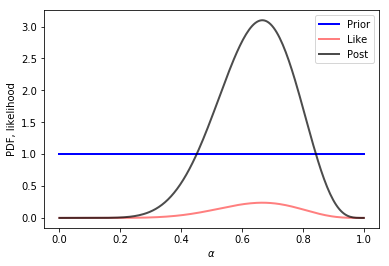

In [10]:
# All together now, making use of the labels:

plot(alphas, prior.pdf(alphas), 'b-', lw=2, label='Prior')
plot(alphas, lvals, 'r-', lw=2, alpha=.5, label='Like')
plot(alphas, prior.pdf(alphas)*lvals/mlike, 'k-', lw=2, alpha=.7, label='Post')

xlabel(r'$\alpha$')
ylabel('PDF, likelihood')
legend()

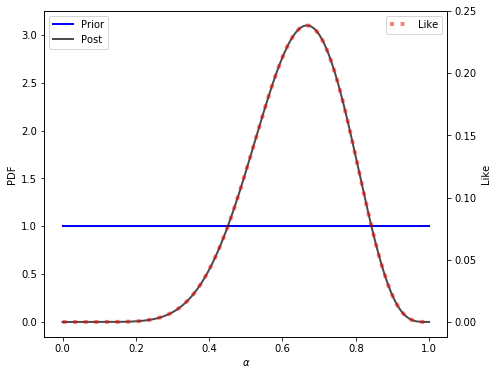

In [11]:
# Let's plot the likelihood with its own ordinate:

class FigLRAxes:
    """
    A figure with two ordinate axes (left and right) sharing a common
    abscissa axis.
    
    In matplotlib lingo, this is a two-scale plot using twinx().
    """

    def __init__(self, figsize=(8,6), l=0.15, r=0.85):
        self.fig = figure(figsize=figsize)
        # Left and right axes:
        self.leftax = self.fig.add_subplot(111)
        self.fig.subplots_adjust(left=l, right=r)
        self.rightax = self.leftax.twinx()
        # Use thicker frame lines.
        self.leftax.patch.set_lw(1.25)  # thicker frame lines
        self.rightax.patch.set_lw(1.25)  # thicker frame lines
        # Leave with the left axes as current.
        self.fig.sca(self.leftax)

    def left(self):
        self.fig.sca(self.leftax)
        return self.leftax

    def right(self):
        self.fig.sca(self.rightax)
        return self.rightax

fig = FigLRAxes()

# Prior, posterior against left axis:
plot(alphas, prior.pdf(alphas), 'b-', lw=2, label='Prior')
plot(alphas, prior.pdf(alphas)*lvals/mlike, 'k-', lw=2, alpha=.7, label='Post')
xlabel(r'$\alpha$')
ylabel('PDF')
legend(loc='upper left')

# Likelihood against the right axis:
fig.right()
plot(alphas, lvals, 'r:', lw=4, alpha=.5, label='Like')
ylabel('Like')
legend(loc='upper right')

# NOTE:  The posterior/likelihood overlap here is an accident of the
# L and R default axis limit choices.

## Vector operations and broadcasting

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


Text(0,0.5,'Like via looping')

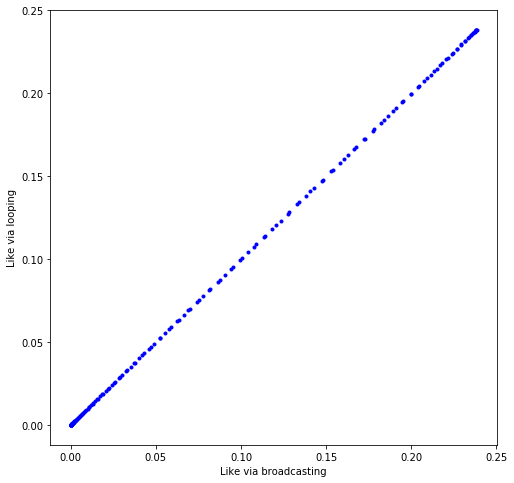

In [32]:
# We could get the likelihoods with an explicit loop.

def like_loop(alphas, n, ntot):
    """
    Likelihood function for `alphas`, a sequence of success probabilities 
    for binomial sampling dist'ns for `n` successes in `ntot` trials.
    
    This computes the likelihood via explicit looping over the values
    in `alphas`.
    """
    lvals = empty_like(alphas)
    for i in range(len(alphas)):
        lvals[i] = stats.binom.pmf(n, ntot, alphas[i])
    return lvals

llvals = like_loop(alphas, n, ntot)
print(llvals - lvals)

figure(figsize=[8,8])
plot(lvals, llvals, 'b.')
xlabel('Like via broadcasting')
ylabel('Like via looping')

So what's the difference? **Speed.** NumPy's ufuncs execute loops over array contents in compiled C code, rather than using the Python virtual machine to loop over Python operations on objects.

We'll compare them here using the IPython "magic" command, `%time`. Learn more about timing and profiling Python code here: [Profiling and Timing Code | Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html).

In [25]:
alphas = linspace(0., 1., 100000)

%time lvals = like(alphas, n, ntot)

CPU times: user 33.1 ms, sys: 10.3 ms, total: 43.5 ms
Wall time: 34 ms


In [26]:
%time llvals = like_loop(alphas, n, ntot)

CPU times: user 21.6 s, sys: 104 ms, total: 21.7 s
Wall time: 21.9 s


### Moral

Avoid explicit looping whenever possible.  Use ufuncs whenever possible. Most of NumPy's familiar numerical functions (`exp`, `log`, `log10`, `sin`, `cos`, etc.) are ufuncs, as are SciPy's special functions and many methods for probability distribution objects.

## Unit tests

We implemented a sanity check above, testing the normalization of the posterior.  Ideally, all code should be tested, explicitly, as throroughly as possible.

*Unit testing* refers to testing code at the lowest level of modularity: constructing one or more tests for any function or method in the code. In contrast, *functional testing* refers to tests of the overall function of a large block of code, or of an entire application.

Unit testing is a key aspect of many modern software development workflows, particularly [Agile software development (Wikipedia)](https://en.wikipedia.org/wiki/Agile_software_development#Philosophy).  An extreme (but popular) case is [Test-driven development (Wikipedia)](https://en.wikipedia.org/wiki/Test-driven_development), a development process in which code is writting by:

* Specifying application requirements in terms of concrete, testable outcomes.
* Writing test case code for each requirement, *before* writing code to implement the requirement.
* Writing application code to satisfy the tests.
* Iterating, always (often automatically) running *all* tests after each iteration (to guard against *regressions*: changes in previously satisfactory behavior).
* If a bug is ever found during application use, a test is written specifically revealing the bug, *before* debugging.

The Python ecosystem has a variety of tools to support unit testing, both in the Python standard library, and in third-party packages. They mainly rely on crative use of **assertions**: a piece of code that tests a condition, raising an exception if the condition fails, but otherwise doing nothing.

Until a few years ago, a popular framework for testing scientific codes was [nose](http://nose.readthedocs.io/en/latest/).  More recently, it is being supplanted by [pytest](https://docs.pytest.org/en/latest/) (also known as `py.test`, which is the name of the command-line command that runs a suite of tests, although you can also use `pytest`).

In [35]:
a = 1
b = 1
assert a == b

In [36]:
c = 2
assert a == c

AssertionError: 

Numerical computation fits somewhat awkwardly with unit testing:

* You often are defining entire *functions*; you can't test every possible input/output combination. So you often can only test *special cases* that have known, simple results. As a result, passing the implemented test(s) does not necessarily imply that the code is sound for all inputs.
* Even for identifiable cases, numerical algorithms are typically *approximate*, almost always limited by machine precision, and sometimes targeting lower precision (for reasons of limited resources).

To address the latter issue, NumPy has a `numpy.testing` module defining assertions useful for numerical work: [Test Support (numpy.testing) — NumPy Manual](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.testing.html).

In [37]:
# A naive test of normalization:

alphas = linspace(0., 1., 200)
pivals = prior.pdf(alphas)
lvals = like(alphas, n, ntot)
mlike = integrate.trapz(pivals*lvals, alphas)
ppdf = pivals*lvals/mlike

assert integrate.trapz(ppdf, alphas) == 1.

AssertionError: 

In [39]:
# Account for roundoff:

import numpy.testing as npt

npt.assert_allclose?

In [41]:
# Use the default of 0 absolute tolerance, 1e-7 relative tolerance:
npt.assert_allclose(integrate.trapz(ppdf, alphas), 1.)

Unit testing *frameworks* typically require tests to be written as Python functions or class methods (often with a particular naming convention).  The framework supports automated discovery and running of tests, as well as providing some advanced testing capability.

In [44]:
def test_norm():
    """
    Test normalization of the posterior (using global quantities).
    """
    npt.assert_allclose(integrate.trapz(ppdf, alphas), 1.)

test_norm()

In [45]:
def test_sym():
    """
    Test symmetry of the posterior for a symmetric test case.
    """
    alphas = linspace(0., 1., 200)
    pivals = prior.pdf(alphas)
    lvals = like(alphas, 5, 10)
    mlike = integrate.trapz(pivals*lvals, alphas)
    ppdf = pivals*lvals/mlike
    npt.assert_allclose(integrate.trapz(ppdf[:100], alphas[:100]), integrate.trapz(ppdf[100:], alphas[100:]))

test_sym()

In [47]:
# Double-check that last one!
alphas = linspace(0., 1., 200)
pivals = prior.pdf(alphas)
lvals = like(alphas, 5, 10)
mlike = integrate.trapz(pivals*lvals, alphas)
ppdf = pivals*lvals/mlike

print(integrate.trapz(ppdf[:100], alphas[:100]))
print(integrate.trapz(ppdf[100:], alphas[100:]))

0.4931992726657837
0.49319927266578384


Let's put the tests in a script.  The script was created from this notebook using:
```
$ jupyter nbconvert --to script Lab05-Distributions+Tests.ipynb
```
(with some minor editing of the script).

In [48]:
!pytest Lab05-Distributions+Tests.py

============================= test session starts ==============================
platform darwin -- Python 3.6.4, pytest-3.3.2, py-1.5.2, pluggy-0.6.0
rootdir: /Volumes/Science/Education/BDA 2018/Labs/Lab05, inifile:
collected 2 items                                                              

Lab05-Distributions+Tests.py ..                                          [100%]

=============================== warnings summary ===============================
Lab05-Distributions+Tests.py
  cannot collect 'test' because it is not a function.

-- Docs: http://doc.pytest.org/en/latest/warnings.html
===================== 2 passed, 1 warnings in 7.51 seconds =====================
